In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
# import cv2 
from tqdm import tqdm
import random

import warnings
warnings.filterwarnings("ignore")


# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, models, optimizers

# import numpy as np
# import collections
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers.schedules import LearningRateSchedule


# Load Data

https://www.kaggle.com/datasets/orvile/gastric-cancer-histopathology-tissue-image-dataset

This dataset comprises 31,096 non-overlapping images, each with a size of 224x224 pixels. These images were extracted from H&E-stained pathological slides of human gastric cancer obtained from Harbin Medical University Cancer Hospital. 

The dataset focuses on the tumor microenvironment (TME) and includes images categorized into eight distinct tissue types:

    ADI: Adipose (fat tissue)
    DEB: Debris (cellular waste) 
    LYM: Lymphocytes (immune cells)
    MUC: Mucus (protective secretion)
    MUS: Smooth Muscle (muscle tissue)
    NORM: Normal Colon Mucosa (healthy tissue for reference)
    STR: Cancer-associated Stroma (connective tissue around the tumor)
    TUM: Tumor (cancerous tissue) 
    
    

In [2]:
path = "Data/HMU-GC-HE-30K/all_image"
tissue_types = os.listdir(path)
tissue_types.sort()

In [3]:
tissue_types

['ADI', 'DEB', 'LYM', 'MUC', 'MUS', 'NOR', 'STR', 'TUM']

Lets plot some images for each tissue types

ADI


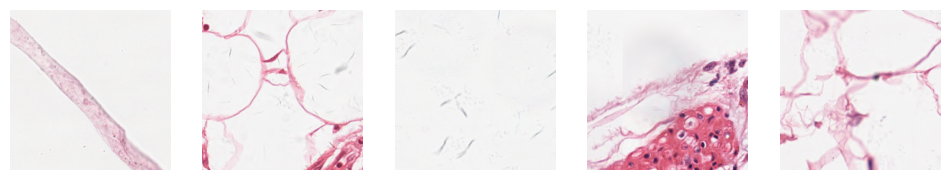

DEB


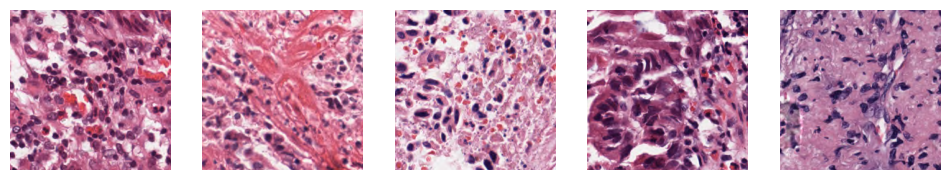

LYM


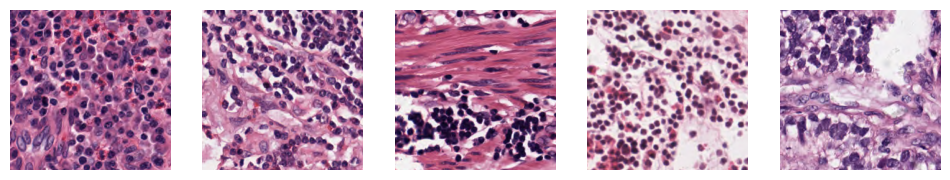

MUC


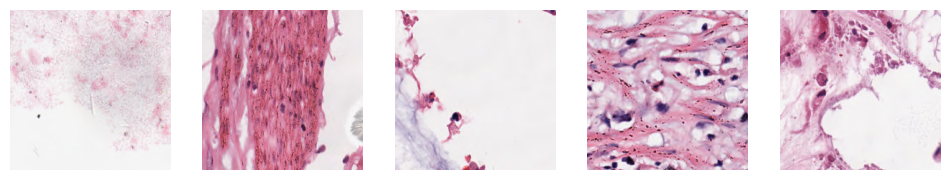

MUS


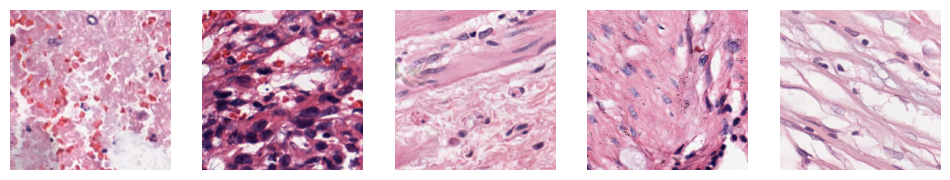

NOR


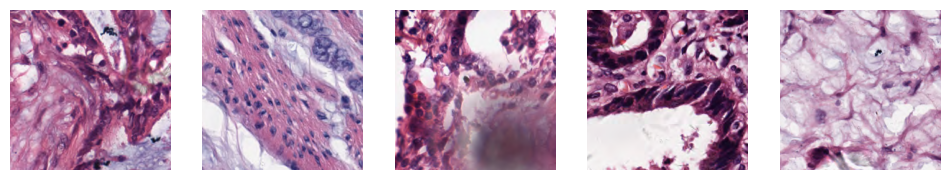

STR


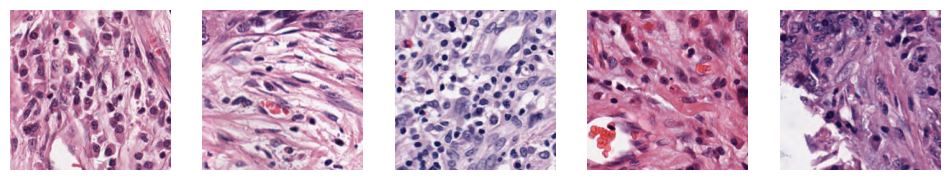

TUM


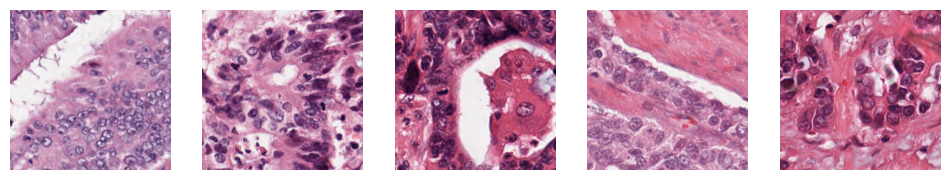

In [4]:
images_per_label = 5
for tissue in tissue_types:
    folder_path = os.path.join(path, tissue)
    folder_files = os.listdir(folder_path)
    random_ind=np.random.randint(0, len(folder_files),images_per_label)
    fig, ax = plt.subplots(1, images_per_label, figsize=(12, 10))
    print(tissue)
    for i, ind in enumerate(random_ind):     
        img = plt.imread(folder_path+'/'+folder_files[ind])
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()



In [5]:
for tissue in tissue_types:
    folder_path = os.path.join(path, tissue)
    if os.path.isdir(folder_path):
        num_images = len([f for f in os.listdir(folder_path)])
        print(f"{tissue}: {num_images} images")

ADI: 3587 images
DEB: 3587 images
LYM: 3587 images
MUC: 3587 images
MUS: 3587 images
NOR: 3587 images
STR: 3587 images
TUM: 3587 images


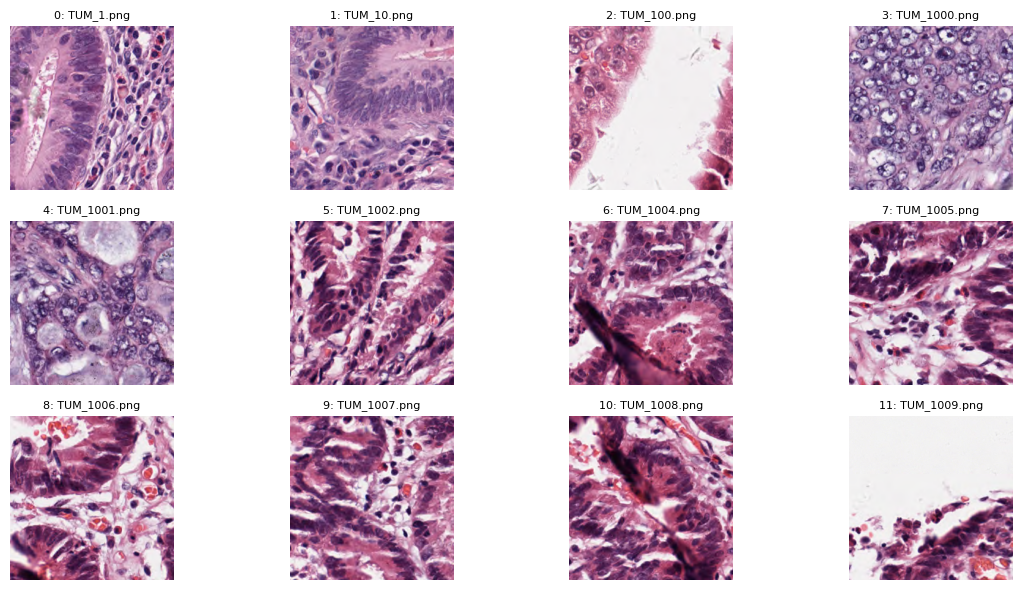

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

tum_dir = 'Data/HMU-GC-HE-30K/all_image/TUM'
tum_files = sorted(os.listdir(tum_dir))[:12]  # show first 12 tiles

plt.figure(figsize=(12, 6))
for i, fname in enumerate(tum_files):
    img_path = os.path.join(tum_dir, fname)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"{i}: {fname}", fontsize=8)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [12]:
import staintools
import cv2
import numpy as np
from PIL import Image
import os
from tqdm import tqdm



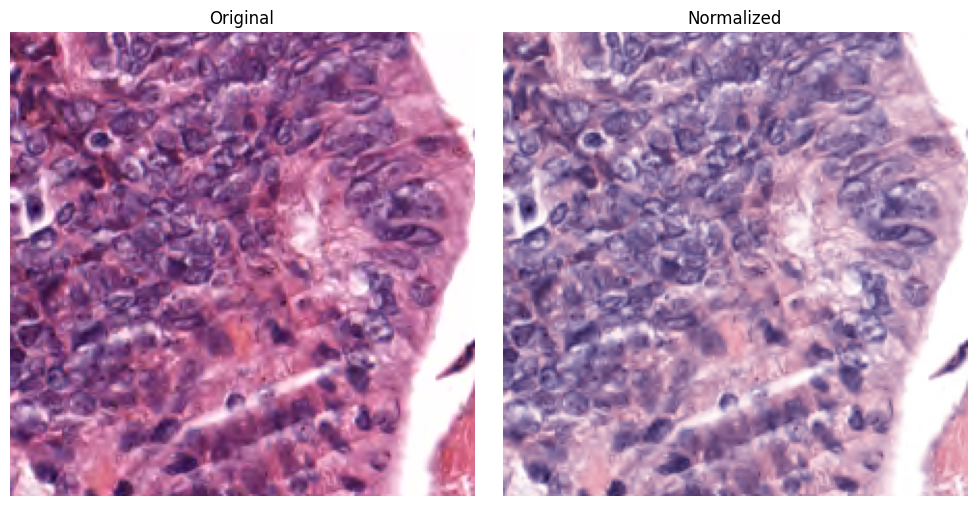

In [15]:
import matplotlib.pyplot as plt
import staintools

# Load original
source_path = 'Data/HMU-GC-HE-30K/all_image/TUM/TUM_11.png'
original = staintools.read_image(source_path)
original = staintools.LuminosityStandardizer.standardize(original)

# Load normalized (from earlier step)
normalized = normalizer.transform(original)

# Plot side-by-side
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(normalized)
plt.title("Normalized")
plt.axis("off")

plt.tight_layout()
plt.show()


In [16]:
import os
import staintools
from PIL import Image
from tqdm import tqdm

# Define paths
input_root = 'Data/HMU-GC-HE-30K/all_image'
output_root = 'Data/HMU-GC-HE-30K/all_image_normalized'
os.makedirs(output_root, exist_ok=True)

# Choose a target/reference image
target_img_path = os.path.join(input_root, 'TUM', 'TUM_10.png')  # good choice based on earlier discussion
target = staintools.read_image(target_img_path)
target = staintools.LuminosityStandardizer.standardize(target)

# Initialize Macenko normalizer
normalizer = staintools.StainNormalizer(method='macenko')
normalizer.fit(target)

# Loop through all tissue type folders
for tissue in os.listdir(input_root):
    tissue_path = os.path.join(input_root, tissue)
    if not os.path.isdir(tissue_path):
        continue

    output_tissue_path = os.path.join(output_root, f"{tissue}_normalized")
    os.makedirs(output_tissue_path, exist_ok=True)

    image_files = [f for f in os.listdir(tissue_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for fname in tqdm(image_files, desc=f"Normalizing {tissue}"):
        try:
            img_path = os.path.join(tissue_path, fname)
            img = staintools.read_image(img_path)
            img = staintools.LuminosityStandardizer.standardize(img)
            norm = normalizer.transform(img)
            Image.fromarray(norm).save(os.path.join(output_tissue_path, fname))
        except Exception as e:
            print(f"Error with {fname} in {tissue}: {e}")


Normalizing ADI:   5%|█                      | 162/3587 [00:16<10:31,  5.43it/s]

Error with ADI_2448.png in ADI: Empty tissue mask computed


Normalizing ADI:  12%|██▊                    | 430/3587 [00:57<05:43,  9.18it/s]

Error with ADI_3621.png in ADI: Empty tissue mask computed


Normalizing ADI:  28%|██████▏               | 1017/3587 [02:18<04:52,  8.80it/s]

Error with ADI_1719.png in ADI: Empty tissue mask computed


Normalizing ADI:  39%|████████▌             | 1406/3587 [03:22<04:30,  8.08it/s]

Error with ADI_2992.png in ADI: Empty tissue mask computed


Normalizing ADI:  40%|████████▊             | 1441/3587 [03:27<03:43,  9.60it/s]

Error with ADI_2996.png in ADI: Empty tissue mask computed


Normalizing ADI:  96%|█████████████████████▏| 3446/3587 [07:25<00:11, 11.76it/s]

Error with ADI_3001.png in ADI: 0-dimensional array given. Array must be at least two-dimensional


Normalizing MUC:  32%|██████▉               | 1135/3587 [02:19<03:14, 12.61it/s]

Error with MUC_3124.png in MUC: 0-dimensional array given. Array must be at least two-dimensional


Normalizing MUC:  45%|█████████▊            | 1604/3587 [03:12<02:46, 11.91it/s]

Error with MUC_2994.png in MUC: Empty tissue mask computed


Normalizing STR: 100%|██████████████████████| 3587/3587 [05:28<00:00, 10.93it/s]


# Create a train and validation dataset

In [55]:
# 85-15 split 

train_ds,val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  labels='inferred',
  validation_split=0.15,
  subset='both',
  seed=85,
  batch_size=16,
  image_size=(224, 224),
  shuffle=True
  )


Found 28696 files belonging to 8 classes.
Using 24392 files for training.
Using 4304 files for validation.


To make sure we have the datasets as intended we can visualize the class names.

In [56]:
train_ds.class_names

['ADI', 'DEB', 'LYM', 'MUC', 'MUS', 'NOR', 'STR', 'TUM']

 We can also fetch one batch of images and labels in the train dataset and look at the shape.

In [57]:
image, label = next(iter(train_ds))
print(image.shape)
print(label.shape)

(16, 224, 224, 3)
(16,)


In [58]:
train_labels = []
for _, labels in train_ds:
    train_labels.extend(labels.numpy())

train_label_counts = collections.Counter(train_labels)
print("Train label distribution:")
print(dict(sorted(train_label_counts.items())))

val_labels = []
for _, labels in val_ds:
    val_labels.extend(labels.numpy())

val_label_counts = collections.Counter(val_labels)
print("\nValidation label distribution:")
print(dict(sorted(val_label_counts.items())))

Train label distribution:
{0: 3078, 1: 3031, 2: 3063, 3: 3068, 4: 3034, 5: 3035, 6: 3060, 7: 3023}

Validation label distribution:
{0: 509, 1: 556, 2: 524, 3: 519, 4: 553, 5: 552, 6: 527, 7: 564}


The sample distributions look reasonably balanced across train, test, and validation sets which is good. 

In [59]:
num_labels=len(train_ds.class_names)

In [65]:
# use buffered prefetching for performance
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)


In [33]:
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal"),
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
# ])

In [62]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

input_tensor = tf.keras.Input(shape=(224, 224, 3))

#x = data_augmentation(input_tensor)
#x = layers.Rescaling(1./255)(x)

x = layers.Rescaling(1./255)(input_tensor)

base_model_1 = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)
x = base_model_1.output

x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)  # matches .flatten(start_dim=1) in PyTorch
x = layers.Dropout(0.3)(x)
output_tensor = layers.Dense(8, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)



In [43]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(128, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(num_labels, activation='softmax')
# ])


In [35]:
# for layer in base_model.layers:
#     layer.trainable = False
# for layer in base_model.layers[-20:]:
#     layer.trainable = True

In [63]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.005, # minimium amount of change to count as an improvement
    patience=16, # how many epochs to wait before stopping
    restore_best_weights=True
)

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    "best_model.h5",
    save_best_only=True,
    monitor="val_loss",
    mode="min"
)

In [66]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
#optimizer = tf.keras.optimizers.legacy.AdamW(learning_rate=1e-4,weight_decay=1e-4)

model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
              ,metrics=['accuracy'])

history = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[early_stopping, checkpoint_callback])

Epoch 1/20
  60/1525 [>.............................] - ETA: 1:18:52 - loss: 2.0440 - accuracy: 0.1708

KeyboardInterrupt: 